<a href="https://colab.research.google.com/github/G-Sohal/K-CAP/blob/main/TheAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-CAP Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.


1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).
4.   The **deadline** for the assignment submission is **29th November 11.59 pm** and no further extension will be provided.
5.   Upload the link to your .ipynb notebook on this [google form](https://docs.google.com/forms/d/e/1FAIpQLSewj0UyD1a22d_GKOq-7_i9yWu40Az_x9s-rxJqVF-60_C9CA/viewform?usp=sharing) for submission.
6.   Make sure you have given access to submission file before submitting.

# All The Best!!



# Cepheids

Cepheids are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [ ]:
import numpy as np

cepheids_path = '/content/cepheids.csv'
data = np.loadtxt(cepheids_path, delimiter=',', skiprows=1) #have to skip headers row

period = data[:, 0]
M = data[:, 1]

log10_period = np.log10(period)

x_mean = np.mean(log10_period)
y_mean = np.mean(M)

# To find a: least square fit formula (from phy lab) where n is large
# So a= (n*(sigma(xy))-sigma(x)*sigma(y))/(n*(sigma(x**2))-(sigma(x)**2))= sigma(xy)/sigma(x**2) as n is large
numerator = np.sum((log10_period - x_mean)*(M - y_mean))
denominator = np.sum((log10_period - x_mean)**2)
a = numerator/denominator

# To find b (the intercept)
b = y_mean - a * x_mean

print(f"a: {a}")
print(f"b: {b}")

a: -2.216410059818041
b: -1.6808674146142553


Next, plot the data along with your fitted line to visually verify that you have found the correct constants.

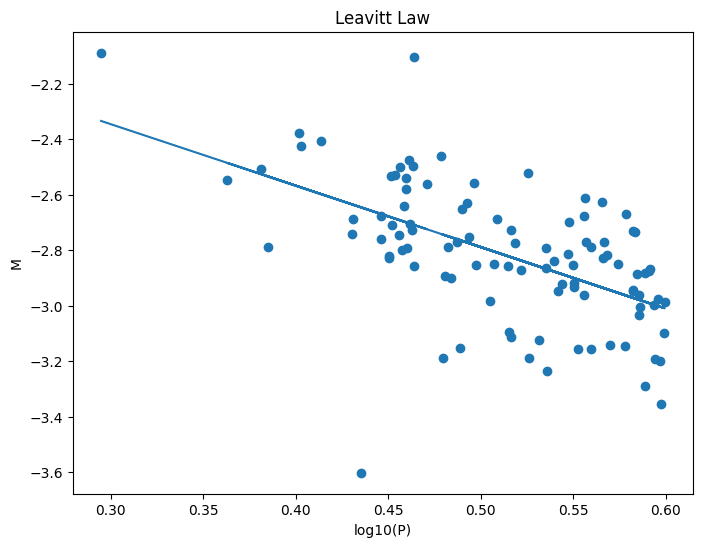

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(log10_period, M)

# Fitted line
plt.plot(log10_period, a*log10_period + b)

# Labels, title
plt.xlabel('log10(P)')
plt.ylabel('M')
plt.title('Leavitt Law')
plt.show()

# Part 2

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

First we need to find the period of each cepheid.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

curves_path = '/content/curves.csv'
data = np.loadtxt(curves_path, delimiter=',', skiprows=1)

def calc_period(jd, mag):
    # Using phase fold
    lower_bound=0.5; upper_bound=1000; num_of_trials=1000
    periods = np.linspace(lower_bound, upper_bound, num_of_trials)
    the_period = 0
    deviation_tmp = np.inf

    for period in periods:
        phases = jd%period
        sorted_indices = np.argsort(phases)
        sorted_mags = mag[sorted_indices]
        # Selecting the one which gives minimum std: since std is a "standard" statistical error measure
        deviation = np.std(sorted_mags)
        if deviation < deviation_tmp:
            deviation_tmp = deviation
            the_period = period

    return the_period

ids = np.unique(data[:, 0]) # An array of the distinct IDs
num_cepheids = len(ids)

cepheid_periods = np.zeros(num_cepheids)

for i in  range(num_cepheids) :
    id = data[:, 0] == ids[i]
    jd = data[id, 1]
    mag = data[id, 2]
    cepheid_periods[i] = calc_period(jd, mag)
    print(f'ID: {ids[i]}, Period: {cepheid_periods[i]} days')

ID: 60103.0, Period: 0.5 days
ID: 98001.0, Period: 0.5 days
ID: 99586.0, Period: 455.72772772772777 days
ID: 100187.0, Period: 2.501001001001001 days
ID: 100256.0, Period: 0.5 days
ID: 102825.0, Period: 0.5 days
ID: 103140.0, Period: 0.5 days
ID: 103295.0, Period: 9.504504504504505 days
ID: 106115.0, Period: 0.5 days
ID: 106721.0, Period: 0.5 days
ID: 107124.0, Period: 1.5005005005005005 days
ID: 108519.0, Period: 117.55855855855856 days
ID: 109844.0, Period: 1.5005005005005005 days
ID: 111500.0, Period: 0.5 days
ID: 113850.0, Period: 0.5 days
ID: 114429.0, Period: 1.5005005005005005 days
ID: 114835.0, Period: 11.505505505505505 days
ID: 115763.0, Period: 10.505005005005005 days
ID: 116004.0, Period: 19.50950950950951 days
ID: 116394.0, Period: 0.5 days
ID: 120376.0, Period: 0.5 days
ID: 122509.0, Period: 9.504504504504505 days
ID: 125990.0, Period: 0.5 days
ID: 129073.0, Period: 886.9434434434435 days
ID: 129488.0, Period: 22.51101101101101 days
ID: 131547.0, Period: 7.503503503503504

Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.



In [ ]:
def abs_magnitude(period):
    return (a*np.log10(period) + b)

abs_mag = np.zeros(num_cepheids)

for i in range(num_cepheids) :
    abs_mag[i] = abs_magnitude(cepheid_periods[i])
    print(f'ID: {ids[i]}, Absolute Magnitude: {abs_mag[i]}')

ID: 60103.0, Absolute Magnitude: -1.0136615039176262
ID: 98001.0, Absolute Magnitude: -1.0136615039176262
ID: 99586.0, Absolute Magnitude: -7.573648926861671
ID: 100187.0, Absolute Magnitude: -2.563250991178137
ID: 100256.0, Absolute Magnitude: -1.0136615039176262
ID: 102825.0, Absolute Magnitude: -1.0136615039176262
ID: 103140.0, Absolute Magnitude: -1.0136615039176262
ID: 103295.0, Absolute Magnitude: -3.8483601537562997
ID: 106115.0, Absolute Magnitude: -1.0136615039176262
ID: 106721.0, Absolute Magnitude: -1.0136615039176262
ID: 107124.0, Absolute Magnitude: -2.071478978458662
ID: 108519.0, Absolute Magnitude: -6.269399765885843
ID: 109844.0, Absolute Magnitude: -2.071478978458662
ID: 111500.0, Absolute Magnitude: -1.0136615039176262
ID: 113850.0, Absolute Magnitude: -1.0136615039176262
ID: 114429.0, Absolute Magnitude: -2.071478978458662
ID: 114835.0, Absolute Magnitude: -4.0322694907453105
ID: 115763.0, Absolute Magnitude: -3.944700368444858
ID: 116004.0, Absolute Magnitude: -4.5

Then, using the apparent magnitude data, find the distance to these cepheid variables.

In [ ]:
def distance(app_mag, abs_mag):
    return 10**((app_mag - abs_mag + 5)/ 5)

cepheid_distance = np.zeros(num_cepheids)

for i in range(num_cepheids) :
    id = data[:, 0] == ids[i]
    mag = data[id, 2]

    cepheid_distance[i] = distance(np.mean(mag), abs_mag[i])
    print(f'ID: {ids[i]}: Distance: {cepheid_distance[i]} ps')

ID: 60103.0: Distance: 125656.55382375394 ps
ID: 98001.0: Distance: 306850.3814794821 ps
ID: 99586.0: Distance: 4076195.675606518 ps
ID: 100187.0: Distance: 444933.5196648528 ps
ID: 100256.0: Distance: 173816.4081655105 ps
ID: 102825.0: Distance: 205697.1057338364 ps
ID: 103140.0: Distance: 353483.81721158465 ps
ID: 103295.0: Distance: 962725.8790633715 ps
ID: 106115.0: Distance: 282937.4880197052 ps
ID: 106721.0: Distance: 234839.80261820747 ps
ID: 107124.0: Distance: 183905.02636091592 ps
ID: 108519.0: Distance: 2957422.932840104 ps
ID: 109844.0: Distance: 212166.11070847072 ps
ID: 111500.0: Distance: 207178.43463102542 ps
ID: 113850.0: Distance: 205686.04342664726 ps
ID: 114429.0: Distance: 321164.6683830555 ps
ID: 114835.0: Distance: 842739.1098409031 ps
ID: 115763.0: Distance: 1125314.4480883689 ps
ID: 116004.0: Distance: 739354.9706627764 ps
ID: 116394.0: Distance: 241808.64585125408 ps
ID: 120376.0: Distance: 203535.21772802543 ps
ID: 122509.0: Distance: 749432.9319589422 ps
ID:

Finally, find the distance to the galaxy being observed.

In [ ]:
gal_distance = np.mean(cepheid_distance)
print(f'Distance to the galaxy being observed: {gal_distance}')

Distance to the galaxy being observed: 1044148.1070688836


# Part 3

Cepheid variable stars are known for their periodic changes in luminosity due to their pulsations. These stars exhibit a well-defined relationship between their pulsation period and intrinsic luminosity, known as the period-luminosity relation. However, the mechanism driving these pulsations involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior.

(a) Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

The ionization zone of a star undergoes inward contraction, which compresses it, increases its density, and becomes more opaque. Any flux/energy from within gets increasingly absorbed, and heat builds up within. The layer expands, lowering its pressure, density, temperature and opacity. The pressure beneath the layer decreases, falling inward again, and the cycle repeats. Kappa is the symbol for the absorption coefficient, and so it is called the kappa mechanism.